<a href="https://colab.research.google.com/github/Saichandu47/Cats-Vs-Dogs-Classification/blob/main/Cats_Vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 43.3MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.6MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
#Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 108ms/step - loss: 1.5400 - accuracy: 0.5896 - val_loss: 0.7317 - val_accuracy: 0.6378
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5782 - accuracy: 0.6974 - val_loss: 0.5399 - val_accuracy: 0.7262
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4930 - accuracy: 0.7627 - val_loss: 0.4713 - val_accuracy: 0.7712
Epoch 4/10
625/625 [==============================] - 68s 107ms/step - loss: 0.4303 - accuracy: 0.8052 - val_loss: 0.4905 - val_accuracy: 0.7770
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3678 - accuracy: 0.8388 - val_loss: 0.4148 - val_accuracy: 0.8122
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3048 - accuracy: 0.8698 - val_loss: 0.4651 - val_accuracy: 0.7964
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2362 - accuracy: 0.9015 - val_loss: 0.5232 - val_ac

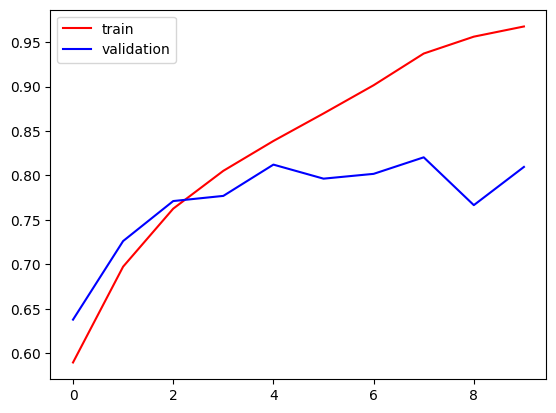

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

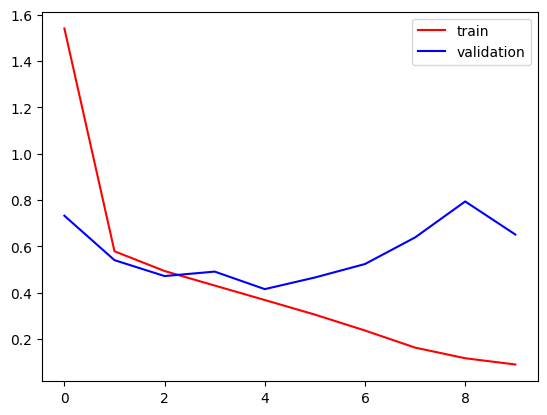

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
#ways to reduce overfitting

#Add more data
#Data Augmentation
#L1/ Regularizer
#Dropout
#Batch Norm
#Reduce Complexity

In [21]:
import cv2

In [22]:
test_img = cv2.imread('/content/dog.jpg')

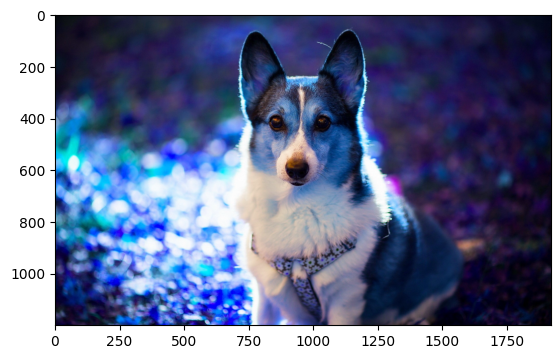

In [23]:
plt.imshow(test_img)

In [26]:
test_img.shape

(1200, 1920, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 0s 471ms/step


array([[1.]], dtype=float32)

In [32]:
test_img1=cv2.imread('/content/cat.jpg')

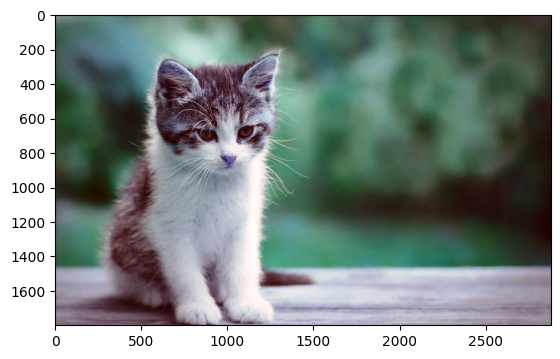

In [33]:
plt.imshow(test_img1)

In [34]:
test_img1 = cv2.resize(test_img1,(256,256))

In [35]:
test_input1 = test_img1.reshape((1,256,256,3))

In [36]:
model.predict(test_input1)

1/1 [==============================] - 0s 149ms/step


array([[0.]], dtype=float32)

In [37]:
#if the output is zero, it indicates cat
#if the output is 1, it indicates dog